In [ ]:
import pandas as pd

In [5]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [6]:
schema = pd.read_excel('/content/drive/MyDrive/challenge/Customer Entity Resolution _ Application Prefill/Application Form Schema.xlsx')
credit_data = pd.read_excel('/content/drive/MyDrive/challenge/Customer Entity Resolution _ Application Prefill/Customer Demographics - Credit Bureau.xlsx')
training_id_match = pd.read_excel('/content/drive/MyDrive/challenge/Customer Entity Resolution _ Application Prefill/Training/Training Data - Ground Truth.xlsx')
training_cust_info = pd.read_excel('/content/drive/MyDrive/challenge/Customer Entity Resolution _ Application Prefill/Training/Training Data.xlsx')

In [7]:
schema

,S.No.,Unnamed: 1,Attributes,Description,Data type
0,1.0,Account Holder Information:,First Name,First name of the account holder.,String
1,NaN,NaN,Middle Name,Middle name of the account holder.,String
2,NaN,NaN,Last Name,Last name of the account holder.,String
3,NaN,NaN,Title,Title of the account holder.,String
4,NaN,NaN,Suffix,Suffix of the account holder.,String
5,NaN,NaN,Date of Birth,Date of birth of the account holder.,Date
6,NaN,NaN,Social Security Number,Unique identification number issued by the gov...,String
7,NaN,NaN,Gender,"The gender identity of customers, such as male...",String
8,NaN,NaN,Nationality,The nationality or country of origin of custom...,String
9,NaN,NaN,Marital Status,"The marital status of customers, indicating wh...",String


In [8]:
credit_data

,id,first_name,Middle name,last_name,prefix,suffix,addr 1,addr 2,city,state,zip,DOB
0,1,Brenda,T,Sample,NaN,NaN,"123 Main St Hartford, CT 06114-1234",NaN,Hartford,Connecticut,06114-1234,1967-01-12 00:00:00
1,2,A Driver,NaN,Sample,NaN,NaN,12012 River Hills,NaN,Aspen,Texas,12345,1990-09-21 00:00:00
2,3,Aaren,Nedi,Lusk,Honorable,IV,820 Donald Avenue,1st Floor,Plano,Texas,75074,1978-06-01 00:00:00
3,4,Aaren,Lorelle,Michael,Dr,II,6 Maple Circle,Room 1828,San Diego,California,92105,2006-09-01 00:00:00
4,5,Aaren,Nicoline,Seifenmacher,Rev,Jr,985 Maywood Court,19th Floor,Phoenix,Arizona,85067,2011-02-01 00:00:00
...,...,...,...,...,...,...,...,...,...,...,...,...
100269,100270,Zuzana,Layton,Greave,Honorable,Sr,38244 Elka Alley,PO Box 23157,Hialeah,Florida,33013,1974-10-01 00:00:00
100270,100271,Zuzana,Verna,Cometto,Mrs,IV,7 Washington Center,Apt 145,Denver,Colorado,80291,1979-05-01 00:00:00
100271,100272,Zuzana,Dal,Frammingham,Rev,Sr,2140 Bunting Terrace,Suite 61,Orlando,Florida,32885,1972-11-01 00:00:00
100272,100273,Zuzana,Rod,Longbothom,Mr,Sr,882 Meadow Valley Crossing,Suite 60,Des Moines,Iowa,50369,1968-04-01 00:00:00


In [9]:
training_id_match

,Cust ID,Credit Bureau ID
0,CustID_101,1824
1,CustID_102,43207
2,CustID_103,27213
3,CustID_104,43208
4,CustID_106,43209
...,...,...
155,CustID_294,8513
156,CustID_295,52189
157,CustID_296,21308
158,CustID_297,48958


In [10]:
credit_data[credit_data['id'] == 21308]

,id,first_name,Middle name,last_name,prefix,suffix,addr 1,addr 2,city,state,zip,DOB
21307,21308,Connor,M,Sample,NaN,Jr,"123 Main Street Jackson, MS 39216-1234",NaN,Jackson,Mississippi,39216-1234,1967-01-12 00:00:00


In [11]:
training_cust_info[training_cust_info['Cust ID'] == 'CustID_296']

,Cust ID,First Name,Middle Name,Last Name,Prefix,Suffix,Address Line 1,Address Line 2,City,State,Zip,DOB
157,CustID_296,ConnorM,Msample,"MsampleConnorM ,Sample",NaN,"Jr ,",123 Main StrJackson,NaN,Jacksonn,M S,39216=1234,1967-01-12 00:00:00


In [12]:
training_cust_info

,Cust ID,First Name,Middle Name,Last Name,Prefix,Suffix,Address Line 1,Address Line 2,City,State,Zip,DOB
0,CustID_101,ALAN LANEE,LANEE,A MENTZER,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,CustID_102,HAPPY T,M,"TRAVELLER, HAPPY",NaN,NaN,NaN,NaN,NaN,NaN,NaN,"Friday, Febraury 5, 1965"
2,CustID_103,"DILSON, ROCKLIN",Dlison,"ROCKLIN, D",NaN,NaN,NaN,NaN,NaN,NaN,NaN,1983-03-15 00:00:00
3,CustID_104,HAPP,",",TRAVELLE R,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2023-01-01 00:00:00
4,CustID_106,H,appy,TRAVELLER,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1981-01-01 00:00:00
...,...,...,...,...,...,...,...,...,...,...,...,...
155,CustID_294,A,JosephA,"JosephASample ,A",NaN,NaN,456 Bloomington Avn Minneapolis,NaN,Minneapolis,Minn.,55417-123,1957-08-15 00:00:00
156,CustID_295,Jo,GeorgeJO,"IngramGeorgeJO ,Jo",NaN,NaN,123 Main Str Small Town,NaN,Sm Town,MS,39999-98765,1948-12-31 00:00:00
157,CustID_296,ConnorM,Msample,"MsampleConnorM ,Sample",NaN,"Jr ,",123 Main StrJackson,NaN,Jacksonn,M S,39216=1234,1967-01-12 00:00:00
158,CustID_297,Jani,NaN,"SampleJani ,",NaN,NaN,"123 Main Str, Jackson",NaN,Jack sonn,Miss.,39216==1234,1999-01-12 00:00:00


In [13]:
a = credit_data[credit_data['id'] == 21308]
b = training_cust_info[training_cust_info['Cust ID'] == 'CustID_296']

In [14]:
selected_columns = a.columns[1:]
selected_columns


Index(['first_name', 'Middle name', 'last_name', 'prefix', 'suffix', 'addr 1',
       'addr 2', 'city', 'state', 'zip', 'DOB'],
      dtype='object')

In [15]:
row_index = 0  # Index of the row you want to convert
selected_values = a.iloc[row_index, 1:]
single_row_text1 = ' '.join(map(str, selected_values))
single_row_text1

'Connor M Sample nan Jr 123 Main Street Jackson, MS  39216-1234 nan Jackson Mississippi 39216-1234 1967-01-12 00:00:00'

In [16]:
row_index = 0  # Index of the row you want to convert
selected_values = b.iloc[row_index, 1:]
single_row_text2 = ' '.join(map(str, selected_values))
single_row_text2

'ConnorM Msample MsampleConnorM ,Sample nan Jr , 123 Main StrJackson nan Jacksonn M S 39216=1234 1967-01-12 00:00:00'

In [17]:
import nltk
nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

In [18]:
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.feature_extraction.text import CountVectorizer
import nltk
from nltk.tokenize import word_tokenize

# Sample data from your two rows
row1 = "21307 21308 Connor M Sample NaN Jr 123 Main Street Jackson, MS 39216-1234 NaN Jackson Mississippi 39216-1234 1967-01-12 00:00:00"
row2 = "157 CustID_296 ConnorM Msample MsampleConnorM ,Sample NaN Jr , 123 Main StrJackson NaN Jacksonn M S 39216=1234 1967-01-12 00:00:00"

# Tokenize the rows
tokens1 = word_tokenize(single_row_text1)
tokens2 = word_tokenize(single_row_text2)

# Convert tokens to lowercase
tokens1 = [token.lower() for token in tokens1]
tokens2 = [token.lower() for token in tokens2]

# Calculate cosine similarity
vectorizer = CountVectorizer().fit_transform([row1, row2])
vectors = vectorizer.toarray()
cosine_sim = cosine_similarity(vectors[0].reshape(1, -1), vectors[1].reshape(1, -1))[0][0]

# Print the cosine similarity score
print("Cosine Similarity:", cosine_sim)


Cosine Similarity: 0.7229702797545335


In [19]:
def get_score(txt1, txt2):

  print(txt1)
  print(txt2)

  # Tokenize the rows
  tokens1 = word_tokenize(txt1)
  tokens2 = word_tokenize(txt2)

  # Convert tokens to lowercase
  tokens1 = [token.lower() for token in tokens1]
  tokens2 = [token.lower() for token in tokens2]

  # Calculate cosine similarity
  vectorizer = CountVectorizer().fit_transform([txt1, txt2])
  vectors = vectorizer.toarray()
  cosine_sim = cosine_similarity(vectors[0].reshape(1, -1), vectors[1].reshape(1, -1))[0][0]

  print(cosine_sim)

  return cosine_sim


In [20]:
training_id_match.head(2)

,Cust ID,Credit Bureau ID
0,CustID_101,1824
1,CustID_102,43207


In [21]:
training_id_match['Cust ID'][0],training_id_match['Credit Bureau ID'][0]


('CustID_101', 1824)

In [22]:
cust_info_lst = []
credit_info_lst = []
score = []

for i in range(training_cust_info.shape[0]):

  a = credit_data[credit_data['id'] == training_id_match['Credit Bureau ID'][i]]
  b = training_cust_info[training_cust_info['Cust ID'] == training_id_match['Cust ID'][i]]


  selected_values1 = b.iloc[0, 1:]
  single_row_text1 = ' '.join(map(str, selected_values1))
  cust_info_lst.append(single_row_text1)

  selected_values2 = a.iloc[0, 1:]
  single_row_text2 = ' '.join(map(str, selected_values2))
  credit_info_lst.append(single_row_text2)

  sim_score = get_score(single_row_text1,single_row_text2)
  score.append(sim_score)



ALAN LANEE LANEE A MENTZER nan nan nan nan nan nan nan nan
ALAN LANE nan MENTZER nan nan nan nan nan nan nan nan
0.965034982271007
HAPPY T M TRAVELLER, HAPPY nan nan nan nan nan nan nan Friday, Febraury 5, 1965
HAPPY nan TRAVELLER nan nan nan nan nan nan nan 1965-02-05 00:00:00
0.899842541331695
DILSON, ROCKLIN Dlison ROCKLIN, D nan nan nan nan nan nan nan 1983-03-15 00:00:00
DILSON nan ROCKLIN nan nan nan nan nan nan nan 1983-03-15 00:00:00
0.9821405584438384
HAPP ,  TRAVELLE R nan nan nan nan nan nan nan 2023-01-01 00:00:00
HAPPY nan TRAVELLER nan nan nan nan nan nan nan 1981-01-01 00:00:00
0.9568578384885204
H appy TRAVELLER nan nan nan nan nan nan nan 1981-01-01 00:00:00
HAPPY nan TRAVELLER nan nan nan nan nan nan nan 1981-01-01 00:00:00
0.9845928482997818
HAPPY Happy T nan JR> nan nan nan nan nan 2023-01-01 00:00:00
HAPPY nan TRAVELLER nan Jr nan nan nan nan nan 1980-01-01 00:00:00
0.9626638889484738
ARON W WARNERR nan nan nan nan nan nan nan 1987-11-24 00:00:00
AARON nan WARNER n

In [23]:
# Create a DataFrame
data = {
    'Cust Info': cust_info_lst,
    'Credit Info': credit_info_lst,
    'Score': score
}

df = pd.DataFrame(data)

In [24]:
df

,Cust Info,Credit Info,Score
0,ALAN LANEE LANEE A MENTZER nan nan nan nan nan...,ALAN LANE nan MENTZER nan nan nan nan nan nan ...,0.965035
1,"HAPPY T M TRAVELLER, HAPPY nan nan nan nan nan...",HAPPY nan TRAVELLER nan nan nan nan nan nan na...,0.899843
2,"DILSON, ROCKLIN Dlison ROCKLIN, D nan nan nan ...",DILSON nan ROCKLIN nan nan nan nan nan nan nan...,0.982141
3,"HAPP , TRAVELLE R nan nan nan nan nan nan nan...",HAPPY nan TRAVELLER nan nan nan nan nan nan na...,0.956858
4,H appy TRAVELLER nan nan nan nan nan nan nan 1...,HAPPY nan TRAVELLER nan nan nan nan nan nan na...,0.984593
...,...,...,...
155,"A JosephA JosephASample ,A nan nan 456 Bloomin...",Avery Joseph Sample nan nan 456 Bloomington Av...,0.788405
156,"Jo GeorgeJO IngramGeorgeJO ,Jo nan nan 123 Mai...",Joseph George Ingram nan nan 123 Main Street S...,0.800250
157,"ConnorM Msample MsampleConnorM ,Sample nan Jr ...",Connor M Sample nan Jr 123 Main Street Jackson...,0.769800
158,"Jani nan SampleJani , nan nan 123 Main Str, Ja...",Janice nan Sample nan nan 123 Main Street Jack...,0.857816


In [25]:
df.to_csv('Algo_Output.csv')

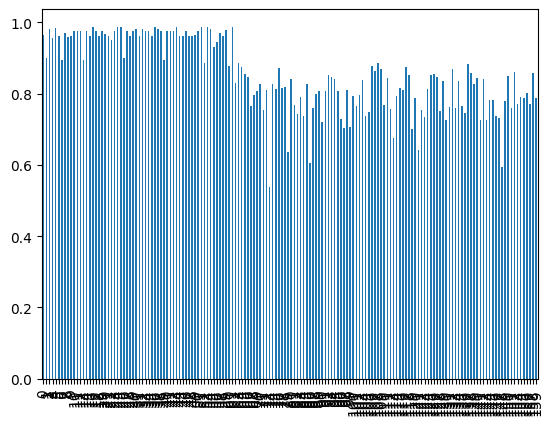

In [26]:
# Plot the 'Score' column
df['Score'].plot(kind='bar')

# Display the plot
import matplotlib.pyplot as plt
plt.show()

In [27]:
def get_matching_data(txt, lst):

   fixed_sent = txt
   scores_list = []
   for x in lst:
      var_sent = x

      # Tokenize the rows
      tokens1 = word_tokenize(fixed_sent)
      tokens2 = word_tokenize(var_sent)

      # Convert tokens to lowercase
      tokens1 = [token.lower() for token in tokens1]
      tokens2 = [token.lower() for token in tokens2]

      # Calculate cosine similarity
      vectorizer = CountVectorizer().fit_transform([fixed_sent, var_sent])
      vectors = vectorizer.toarray()
      cosine_sim = cosine_similarity(vectors[0].reshape(1, -1), vectors[1].reshape(1, -1))[0][0]

      scores_list.append(cosine_sim)

   return scores_list


In [28]:
search = 100

In [29]:
search_info = cust_info_lst[search]
search_info

'Imq Georgie Sampler ImqGeorgie nan nan 123 AnyStreet Anytown nan Any town G A 12345 748 1983-02-09 00:00:00'

In [30]:
credit_info_lst[search]

'Ima  Georgia Sampler nan nan 123 Any Street Anytown, GA 12345 nan Anytown Georgia 12345 1983-02-09 00:00:00'

In [31]:
output = get_matching_data(search_info, credit_info_lst)
index = output.index(max(output))
print(max(output))
credit_info_lst[index]

0.792593923901217


'Ima  Georgia Sampler nan nan 123 Any Street Anytown, GA 12345 nan Anytown Georgia 12345 1983-02-09 00:00:00'

In [33]:
counter = 0
inaccurate = []
for i in range(160):

    output = get_matching_data(cust_info_lst[i], credit_info_lst)
    index = output.index(max(output))
    if credit_info_lst[i] == credit_info_lst[index]:
      counter +=1
    if credit_info_lst[i] != credit_info_lst[index]:
      inaccurate.append((i,index))

print(f'Accuracy: {counter/160}')

Accuracy: 0.78125


In [34]:
len(inaccurate)

35

In [35]:
for a,b in inaccurate:
    print(a,b)
    print('Input Sentence')
    print(cust_info_lst[a])
    print('Ideal Data to be fetched')
    print(credit_info_lst[a])
    print('Data fetched')
    print(credit_info_lst[b])
    print()

1 0
Input Sentence
HAPPY T M TRAVELLER, HAPPY nan nan nan nan nan nan nan Friday, Febraury 5, 1965
Ideal Data to be fetched
HAPPY nan TRAVELLER nan nan nan nan nan nan nan 1965-02-05 00:00:00
Data fetched
ALAN LANE nan MENTZER nan nan nan nan nan nan nan nan

6 9
Input Sentence
ARON W WARNERR nan nan nan nan nan nan nan 1987-11-24 00:00:00
Ideal Data to be fetched
AARON nan WARNER nan nan nan nan nan nan nan 11/24/1987
Data fetched
GILBERT nan MILLER nan nan nan nan nan nan nan 1999-11-02 00:00:00

13 0
Input Sentence
VAL nan KAUFFMAN nan nan nan nan nan nan nan Tuesday, Sept 18, 1973
Ideal Data to be fetched
VALERIE nan KAUFMAN nan nan nan nan nan nan nan 1973-09-18 00:00:00
Data fetched
ALAN LANE nan MENTZER nan nan nan nan nan nan nan nan

21 3
Input Sentence
PAL nan ADAM nan nan nan nan nan nan nan 1981-03-01 00:00:00
Ideal Data to be fetched
PAUL nan ADAMS nan nan nan nan nan nan nan 1981-03-10 00:00:00
Data fetched
HAPPY nan TRAVELLER nan nan nan nan nan nan nan 1981-01-01 00:00: